In [1]:
import re

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Classification

### Problem Statement
- You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

### Task
- Given a person’s credit-related information, build a machine learning model that can classify the credit score.

In [2]:
df = pd.read_csv('Data/CreditScoreClassification/train.csv')
# test = pd.read_csv('Data/CreditScoreClassification/test.csv')

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/3785716788.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/CreditScoreClassification/train.csv')


In [3]:
df

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12            1824.843333                  3  ...   
1      Scientist      19114.12                    NaN                  3  ...   
2      Scientist      19114.12                    NaN                  3  ...   
3      Scientist      19114.12                    NaN                  3  ...   
4      Scientist      19114.12            1824.843333                  3  ...   
...          ...           ...                    ...                ...  ...   
99995   Mechanic      39628.99            3359.415833                  4  ...   
99996   Mechanic      39628.99            3359.415833                  4  ...   
99997   Mechanic      39628.99            3359.415833                  4  ...   
99998   Mechanic      39628.99            3359.415833                  4  ...   
99999   Mechanic     39628.99_            3359.415833                  4  ...   

       Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0               _            809.98                26.822620   
1            Good            809.98                31.944960   
2            Good            809.98                28.609352   
3            Good            809.98                31.377862   
4            Good            809.98                24.797347   
...           ...               ...                      ...   
99995           _            502.38                34.663572   
99996           _            502.38                40.565631   
99997        Good            502.38                41.255522   
99998        Good            502.38                33.638208   
99999        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0           80.41529543900253   High_spent_Small_value_payments   
1          118.28022162236736    Low_spent_Large_value_payments   
2             81.699521264648   Low_spent_Medium_value_payments   
3           199.4580743910713    Low_spent_Small_value_payments   
4          41.420153086217326  High_spent_Medium_value_payments   
...                       ...                               ...   

In [4]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

### creating the metadata dict

In [5]:
metadata_dict = {}

In [6]:
df.Annual_Income = df.Annual_Income.apply(lambda x : re.findall('\d+.\.\d+', x)[0]).apply(float).apply(lambda x : round(x,2))
df

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0      ...           _            809.98                26.822620   
1      ...        Good            809.98                31.944960   
2      ...        Good            809.98                28.609352   
3      ...        Good            809.98                31.377862   
4      ...        Good            809.98                24.797347   
...    ...         ...               ...                      ...   
99995  ...           _            502.38                34.663572   
99996  ...           _            502.38                40.565631   
99997  ...        Good            502.38                41.255522   
99998  ...        Good            502.38                33.638208   
99999  ...        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0           80.41529543900253   High_spent_Small_value_payments   
1          118.28022162236736    Low_spent_Large_value_payments   
2             81.699521264648   Low_spent_Medium_value_payments   
3           199.4580743910713    Low_spent_Small_value_payments   
4          41.420153086217326  High_spent_Medium_value_payments   
...                       ...                         

In [7]:
df.Monthly_Inhand_Salary = df.Monthly_Inhand_Salary.apply(lambda x : round(x,2))
df

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12                1824.84                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12                1824.84                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99                3359.42                  4   
99996   Mechanic       39628.99                3359.42                  4   
99997   Mechanic       39628.99                3359.42                  4   
99998   Mechanic       39628.99                3359.42                  4   
99999   Mechanic       39628.99                3359.42                  4   

       ...  Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0      ...           _            809.98                26.822620   
1      ...        Good            809.98                31.944960   
2      ...        Good            809.98                28.609352   
3      ...        Good            809.98                31.377862   
4      ...        Good            809.98                24.797347   
...    ...         ...               ...                      ...   
99995  ...           _            502.38                34.663572   
99996  ...           _            502.38                40.565631   
99997  ...        Good            502.38                41.255522   
99998  ...        Good            502.38                33.638208   
99999  ...        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0           80.41529543900253   High_spent_Small_value_payments   
1          118.28022162236736    Low_spent_Large_value_payments   
2             81.699521264648   Low_spent_Medium_value_payments   
3           199.4580743910713    Low_spent_Small_value_payments   
4          41.420153086217326  High_spent_Medium_value_payments   
...                       ...                         

In [8]:
inc_data = df[['Customer_ID', 'Annual_Income', 'Monthly_Inhand_Salary']].drop_duplicates().reset_index(drop= True)
inc_data

Customer_ID  Annual_Income  Monthly_Inhand_Salary
0       CUS_0xd40       19114.12                1824.84
1       CUS_0xd40       19114.12                    NaN
2      CUS_0x21b1       34847.84                3037.99
3      CUS_0x21b1       34847.84                    NaN
4      CUS_0x2dbc      143162.64               12187.22
...           ...            ...                    ...
23288   CUS_0xf16       16680.35                    NaN
23289  CUS_0xaf61       37188.10                3097.01
23290  CUS_0xaf61       37188.10                    NaN
23291  CUS_0x8600       20002.88                1929.91
23292  CUS_0x942c       39628.99                3359.42

[23293 rows x 3 columns]

In [9]:
inc_data_grouped_cnt = inc_data.groupby('Customer_ID').agg({'Annual_Income':(lambda x : len(set(x)))})
inc_data_grouped_cnt

Annual_Income
Customer_ID               
CUS_0x1000               1
CUS_0x1009               1
CUS_0x100b               1
CUS_0x1011               1
CUS_0x1013               1
...                    ...
CUS_0xff3                1
CUS_0xff4                1
CUS_0xff6                1
CUS_0xffc                1
CUS_0xffd                1

[12500 rows x 1 columns]

In [10]:
inc_data_grouped_cnt.Annual_Income.value_counts()

1    11535
2      933
3       30
4        2
Name: Annual_Income, dtype: int64

In [11]:
rep_cids = list(set(inc_data_grouped_cnt[inc_data_grouped_cnt.Annual_Income>1].index))
rep_cids

['CUS_0x7d6e',
 'CUS_0x3dfc',
 'CUS_0x26d7',
 'CUS_0x3ed3',
 'CUS_0x697f',
 'CUS_0xa8c0',
 'CUS_0x8d17',
 'CUS_0x30ae',
 'CUS_0x383c',
 'CUS_0x7577',
 'CUS_0x13a9',
 'CUS_0x62f4',
 'CUS_0x8197',
 'CUS_0x1255',
 'CUS_0x1ab3',
 'CUS_0xe5b',
 'CUS_0x2d07',
 'CUS_0x2547',
 'CUS_0x1f4f',
 'CUS_0x1dc1',
 'CUS_0xa4db',
 'CUS_0x36fb',
 'CUS_0x569b',
 'CUS_0x288b',
 'CUS_0x41f3',
 'CUS_0x21c0',
 'CUS_0xb3b4',
 'CUS_0x59d8',
 'CUS_0x24bb',
 'CUS_0x87db',
 'CUS_0x9df6',
 'CUS_0x2425',
 'CUS_0x1864',
 'CUS_0x403a',
 'CUS_0x2f02',
 'CUS_0x448a',
 'CUS_0x8959',
 'CUS_0xb798',
 'CUS_0x7ea2',
 'CUS_0x63af',
 'CUS_0x251e',
 'CUS_0xbe4b',
 'CUS_0xb226',
 'CUS_0x33bc',
 'CUS_0x473f',
 'CUS_0x31d5',
 'CUS_0x5b8c',
 'CUS_0x3ded',
 'CUS_0x854c',
 'CUS_0xb293',
 'CUS_0x8c69',
 'CUS_0x1183',
 'CUS_0xbac4',
 'CUS_0x1329',
 'CUS_0x78e8',
 'CUS_0x228c',
 'CUS_0x37e1',
 'CUS_0x8430',
 'CUS_0xadbd',
 'CUS_0x6abf',
 'CUS_0x75c6',
 'CUS_0x4a93',
 'CUS_0x45b',
 'CUS_0x9894',
 'CUS_0xa61a',
 'CUS_0x81b8',
 'CUS_0x992c

In [12]:
inc_data[inc_data.Customer_ID.isin(rep_cids)].sort_values('Customer_ID').reset_index(drop=True)

Customer_ID  Annual_Income  Monthly_Inhand_Salary
0     CUS_0x1018       61194.81                5014.57
1     CUS_0x1018       61194.81                    NaN
2     CUS_0x1018    17117486.00                5014.57
3     CUS_0x1057       86617.16                7250.10
4     CUS_0x1057     1105753.00                7250.10
...          ...            ...                    ...
2687   CUS_0xf55    20350298.00                6358.96
2688   CUS_0xf55       78443.48                6358.96
2689   CUS_0xfa4       15035.19                    NaN
2690   CUS_0xfa4       15035.19                1214.93
2691   CUS_0xfa4     7711339.00                1214.93

[2692 rows x 3 columns]

### Analyzing the year to month salary ratio

In [13]:
61194.81/5014.57

12.203401288644889

In [14]:
17117486.00/5014.57

3413.550114964992

In [15]:
86617.16/7250.10

11.947029696142122

In [16]:
1105753.00/7250.10

152.51555150963435

In [17]:
inc_data['annual_monthly_ratio'] = inc_data.Annual_Income / inc_data.Monthly_Inhand_Salary
inc_data

Customer_ID  Annual_Income  Monthly_Inhand_Salary  annual_monthly_ratio
0       CUS_0xd40       19114.12                1824.84             10.474409
1       CUS_0xd40       19114.12                    NaN                   NaN
2      CUS_0x21b1       34847.84                3037.99             11.470690
3      CUS_0x21b1       34847.84                    NaN                   NaN
4      CUS_0x2dbc      143162.64               12187.22             11.746948
...           ...            ...                    ...                   ...
23288   CUS_0xf16       16680.35                    NaN                   NaN
23289  CUS_0xaf61       37188.10                3097.01             12.007743
23290  CUS_0xaf61       37188.10                    NaN                   NaN
23291  CUS_0x8600       20002.88                1929.91             10.364670
23292  CUS_0x942c       39628.99                3359.42             11.796379

[23293 rows x 4 columns]

In [18]:
cids = inc_data.Customer_ID.unique()
cids

array(['CUS_0xd40', 'CUS_0x21b1', 'CUS_0x2dbc', ..., 'CUS_0xaf61',
       'CUS_0x8600', 'CUS_0x942c'], dtype=object)

In [19]:
len(inc_data[inc_data.annual_monthly_ratio <= 24].Customer_ID.unique())

12500

In [20]:
len(cids)

12500

In [21]:
filtered_inc_data = inc_data[inc_data.annual_monthly_ratio <= 24]
filtered_inc_data

Customer_ID  Annual_Income  Monthly_Inhand_Salary  annual_monthly_ratio
0       CUS_0xd40       19114.12                1824.84             10.474409
2      CUS_0x21b1       34847.84                3037.99             11.470690
4      CUS_0x2dbc      143162.64               12187.22             11.746948
6      CUS_0xb891       30689.89                2612.49             11.747371
7      CUS_0x1cdb       35547.71                2853.31             12.458411
...           ...            ...                    ...                   ...
23285  CUS_0x372c       42903.79                3468.32             12.370194
23287   CUS_0xf16       16680.35                1528.03             10.916245
23289  CUS_0xaf61       37188.10                3097.01             12.007743
23291  CUS_0x8600       20002.88                1929.91             10.364670
23292  CUS_0x942c       39628.99                3359.42             11.796379

[13244 rows x 4 columns]

In [22]:
filtered_inc_data_agg_count = filtered_inc_data.groupby('Customer_ID').agg({'Annual_Income':'count'})
filtered_inc_data_agg_count

Annual_Income
Customer_ID               
CUS_0x1000               1
CUS_0x1009               1
CUS_0x100b               1
CUS_0x1011               1
CUS_0x1013               1
...                    ...
CUS_0xff3                1
CUS_0xff4                1
CUS_0xff6                1
CUS_0xffc                1
CUS_0xffd                1

[12500 rows x 1 columns]

In [23]:
filtered_inc_data_agg_count.Annual_Income.value_counts()

1    11756
2      744
Name: Annual_Income, dtype: int64

In [24]:
stage_2_cids = list(set(filtered_inc_data_agg_count[filtered_inc_data_agg_count.Annual_Income==2].index))
len(stage_2_cids)

744

In [25]:
stage2_filtered_inc_data = filtered_inc_data[filtered_inc_data.Customer_ID.isin(stage_2_cids)]
stage2_filtered_inc_data = stage2_filtered_inc_data.sort_values('Customer_ID').reset_index(drop = True)
stage2_filtered_inc_data

Customer_ID  Annual_Income  Monthly_Inhand_Salary  annual_monthly_ratio
0     CUS_0x105b       34428.21                2575.02             13.370075
1     CUS_0x105b       34428.21                2289.59             15.036845
2     CUS_0x1075       24709.33                1933.47             12.779785
3     CUS_0x1075       24709.33                2086.11             11.844692
4     CUS_0x108a       36982.36                2808.86             13.166324
...          ...            ...                    ...                   ...
1483   CUS_0xf74       17111.35                1367.65             12.511498
1484   CUS_0xfac       20908.12                1652.34             12.653643
1485   CUS_0xfac       20908.12                1566.91             13.343536
1486   CUS_0xfb8       34636.64                3136.39             11.043474
1487   CUS_0xfb8       34636.64                2892.64             11.974058

[1488 rows x 4 columns]

In [26]:
Rectified_Monthly_Salary_In_Hand = stage2_filtered_inc_data.groupby('Customer_ID').agg({'Monthly_Inhand_Salary' : (lambda x : np.min(list(x)))}).reset_index()
Rectified_Monthly_Salary_In_Hand = Rectified_Monthly_Salary_In_Hand.rename({'Monthly_Inhand_Salary':'Rectified_Monthly_Salary_In_Hand'}, axis = 'columns')
Rectified_Monthly_Salary_In_Hand

Customer_ID  Rectified_Monthly_Salary_In_Hand
0    CUS_0x105b                           2289.59
1    CUS_0x1075                           1933.47
2    CUS_0x108a                           2554.81
3    CUS_0x10a9                           1324.95
4    CUS_0x10f9                          11102.14
..          ...                               ...
739   CUS_0xe75                           2696.02
740   CUS_0xe84                           1613.06
741   CUS_0xf74                           1366.95
742   CUS_0xfac                           1566.91
743   CUS_0xfb8                           2892.64

[744 rows x 2 columns]

In [27]:
filtered_inc_data_2 = pd.merge(filtered_inc_data, Rectified_Monthly_Salary_In_Hand, on = 'Customer_ID', how = 'left')
filtered_inc_data_2

Customer_ID  Annual_Income  Monthly_Inhand_Salary  annual_monthly_ratio  \
0       CUS_0xd40       19114.12                1824.84             10.474409   
1      CUS_0x21b1       34847.84                3037.99             11.470690   
2      CUS_0x2dbc      143162.64               12187.22             11.746948   
3      CUS_0xb891       30689.89                2612.49             11.747371   
4      CUS_0x1cdb       35547.71                2853.31             12.458411   
...           ...            ...                    ...                   ...   
13239  CUS_0x372c       42903.79                3468.32             12.370194   
13240   CUS_0xf16       16680.35                1528.03             10.916245   
13241  CUS_0xaf61       37188.10                3097.01             12.007743   
13242  CUS_0x8600       20002.88                1929.91             10.364670   
13243  CUS_0x942c       39628.99                3359.42             11.796379   

       Rectified_Monthly_Salary_In_Hand  
0                                   NaN  
1                                   NaN  
2                                   NaN  
3                                   NaN  
4                                   NaN  
...                                 ...  
13239                               NaN  
13240                               NaN  
13241                               NaN  
13242                               NaN  
13243                               NaN  

[13244 rows x 5 columns]

In [28]:
filtered_inc_data_2.isna().sum()

Customer_ID                             0
Annual_Income                           0
Monthly_Inhand_Salary                   0
annual_monthly_ratio                    0
Rectified_Monthly_Salary_In_Hand    11756
dtype: int64

In [29]:
filtered_inc_data_2['Final_Monthly_Inhand_Salary'] = np.where(filtered_inc_data_2.Rectified_Monthly_Salary_In_Hand.isna(), filtered_inc_data_2.Monthly_Inhand_Salary, filtered_inc_data_2.Rectified_Monthly_Salary_In_Hand)
filtered_inc_data_2

Customer_ID  Annual_Income  Monthly_Inhand_Salary  annual_monthly_ratio  \
0       CUS_0xd40       19114.12                1824.84             10.474409   
1      CUS_0x21b1       34847.84                3037.99             11.470690   
2      CUS_0x2dbc      143162.64               12187.22             11.746948   
3      CUS_0xb891       30689.89                2612.49             11.747371   
4      CUS_0x1cdb       35547.71                2853.31             12.458411   
...           ...            ...                    ...                   ...   
13239  CUS_0x372c       42903.79                3468.32             12.370194   
13240   CUS_0xf16       16680.35                1528.03             10.916245   
13241  CUS_0xaf61       37188.10                3097.01             12.007743   
13242  CUS_0x8600       20002.88                1929.91             10.364670   
13243  CUS_0x942c       39628.99                3359.42             11.796379   

       Rectified_Monthly_Salary_In_Hand  Final_Monthly_Inhand_Salary  
0                                   NaN                      1824.84  
1                                   NaN                      3037.99  
2                                   NaN                     12187.22  
3                                   NaN                      2612.49  
4                                   NaN                      2853.31  
...                                 ...                          ...  
13239                               NaN                      3468.32  
13240                               NaN                      1528.03  
13241                               NaN                      3097.01  
13242                               NaN                      1929.91  
13243                               NaN                      3359.42  

[13244 rows x 6 columns]

In [30]:
filtered_inc_data_3 = filtered_inc_data_2[['Customer_ID', 'Annual_Income', 'Final_Monthly_Inhand_Salary']].drop_duplicates().reset_index(drop=True)
filtered_inc_data_3

Customer_ID  Annual_Income  Final_Monthly_Inhand_Salary
0       CUS_0xd40       19114.12                      1824.84
1      CUS_0x21b1       34847.84                      3037.99
2      CUS_0x2dbc      143162.64                     12187.22
3      CUS_0xb891       30689.89                      2612.49
4      CUS_0x1cdb       35547.71                      2853.31
...           ...            ...                          ...
12495  CUS_0x372c       42903.79                      3468.32
12496   CUS_0xf16       16680.35                      1528.03
12497  CUS_0xaf61       37188.10                      3097.01
12498  CUS_0x8600       20002.88                      1929.91
12499  CUS_0x942c       39628.99                      3359.42

[12500 rows x 3 columns]

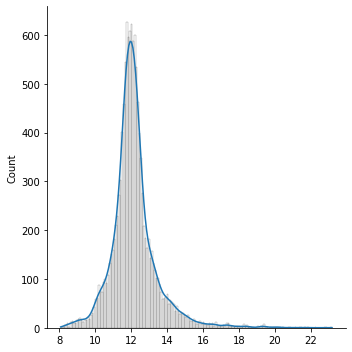

In [31]:
sns.displot(filtered_inc_data_3.Annual_Income/filtered_inc_data_3.Final_Monthly_Inhand_Salary, kde = True, alpha = 0)

In [32]:
metadata_dict['income_metadata'] = filtered_inc_data_3

----------------------------------------------------------------------------------------------------------------

Assumption : The income data is monotonous in nature; i.e there is no revision of salary of the employee in therese 8 given months

----------------------------------------------------------------------------------------------------------------

In [33]:
df = df.drop(columns = ['Annual_Income', 'Monthly_Inhand_Salary'])
df

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  ...  \
0      Scientist                  3                4              3  ...   
1      Scientist                  3                4              3  ...   
2      Scientist                  3                4              3  ...   
3      Scientist                  3                4              3  ...   
4      Scientist                  3                4              3  ...   
...          ...                ...              ...            ...  ...   
99995   Mechanic                  4                6              7  ...   
99996   Mechanic                  4                6              7  ...   
99997   Mechanic                  4                6           5729  ...   
99998   Mechanic                  4                6              7  ...   
99999   Mechanic                  4                6              7  ...   

      Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0              _           809.98                 26.822620   
1           Good           809.98                 31.944960   
2           Good           809.98                 28.609352   
3           Good           809.98                 31.377862   
4           Good           809.98                 24.797347   
...          ...              ...                       ...   
99995          _           502.38                 34.663572   
99996          _           502.38                 40.565631   
99997       Good           502.38                 41.255522   
99998       Good           502.38                 33.638208   
99999       Good           502.38                 34.192463   

           Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0       22 Years and 1 Months                    No            49.574949   
1                         NaN                    No            49.574949   
2       22 Years and 3 Months                    No            49.574949   
3       22 Years and 4 Months                    No            49.574949   
4       22 Years and 5 Months                    No            49.574949   
...                       ...                   ...                  ...   
99995   31 Years and 6 Months                    No            35.104023   
99996   31 Years and 7 Months                    No            35.104023   
99997   31 Years and 8 Months                    No            35.104023   
99998   31 Years and 9 Months                    No            35.104023   
99999  31 Years and 10 Months                    No            35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0           80.41529543900253   High_spent_Small_value_payments   
1          118.28022162236736    Low_spent_Large_value_payments   
2             81.699521264648   Low_spent_Medium_value_payments   
3           199.4580743910713    Low_spent_Small_value_payments   
4          41.420153086217326  High_spent_Medium_value_payments   
...                       ...                               ...   
99995       60.97133255718485   High_spent_Large_value_payments   
9999

In [34]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [35]:
cols_to_be_dropped = ['ID', 'Name', 'SSN']
df = df.drop(columns = cols_to_be_dropped)
df

Customer_ID     Month   Age Occupation  Num_Bank_Accounts  \
0       CUS_0xd40   January    23  Scientist                  3   
1       CUS_0xd40  February    23  Scientist                  3   
2       CUS_0xd40     March  -500  Scientist                  3   
3       CUS_0xd40     April    23  Scientist                  3   
4       CUS_0xd40       May    23  Scientist                  3   
...           ...       ...   ...        ...                ...   
99995  CUS_0x942c     April    25   Mechanic                  4   
99996  CUS_0x942c       May    25   Mechanic                  4   
99997  CUS_0x942c      June    25   Mechanic                  4   
99998  CUS_0x942c      July    25   Mechanic                  4   
99999  CUS_0x942c    August    25   Mechanic                  4   

       Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                    4              3           4   
1                    4              3           4   
2                    4              3           4   
3                    4              3           4   
4                    4              3           4   
...                ...            ...         ...   
99995                6              7           2   
99996                6              7           2   
99997                6           5729           2   
99998                6              7           2   
99999                6              7           2   

                                            Type_of_Loan  Delay_from_due_date  \
0      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1      Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3      Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4      Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   
...                                                  ...                  ...   
99995                        Auto Loan, and Student Loan                   23   
99996                        Auto Loan, and Student Loan                   18   
99997                        Auto Loan, and Student Loan                   27   
99998                        Auto Loan, and Student Loan                   20   
99999                        Auto Loan, and Student Loan                   18   

       ... Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...          _           809.98                 26.822620   
1      ...       Good           809.98                 31.944960   
2      ...       Good           809.98                 28.609352   
3      ...       Good           809.98                 31.377862   
4      ...       Good           809.98                 24.797347   
...    ...        ...              ...                       ...   
99995  ...          _           502.38                 34.663572   
99996  ...          _           502.38                 40.565631   
99997  ...       Good           502.38                 41.255522   
99998  ...       Good           502.38                 33.638208   
99999  ...       Good           502.38                 34.192463   

           Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0       22 Years and 1 Months                    No            49.574949   
1                         NaN                    No            49.574949   
2       22 Years and 3 Months                    No            49.574949   
3       22 Years and 4 Months                    No            49.574949   
4       22 Years and 5 Months                    No            49.574949   
...                       ...                   ...                  ...   
99995   31 Years and 6 Months                    No            35.104023   
99996   31 Years and 7 Months                    No            35.104023   
99997   31 Years and 8 Months                    No            35.104023   
99998   31 Yea

### Analysing the month

In [36]:
month_agg = df.groupby('Customer_ID').agg({'Month' : (lambda x : len(set(x)))})
month_agg.Month.value_counts()

8    12500
Name: Month, dtype: int64

### Analyzing the age

In [37]:
age_agg = df.groupby('Customer_ID').agg({'Age' : (lambda x : len(set(x)))})
age_agg.Age.value_counts()

2    5895
3    3156
1    2826
4     576
5      44
6       3
Name: Age, dtype: int64

In [38]:
age_discrepancy_cids = list(set(age_agg[age_agg.Age>2].index))
len(age_discrepancy_cids)

3779

In [39]:
age_data = df[['Customer_ID', 'Month', 'Age']].drop_duplicates()
age_data

Customer_ID     Month   Age
0       CUS_0xd40   January    23
1       CUS_0xd40  February    23
2       CUS_0xd40     March  -500
3       CUS_0xd40     April    23
4       CUS_0xd40       May    23
...           ...       ...   ...
99995  CUS_0x942c     April    25
99996  CUS_0x942c       May    25
99997  CUS_0x942c      June    25
99998  CUS_0x942c      July    25
99999  CUS_0x942c    August    25

[100000 rows x 3 columns]

In [40]:
age_data.groupby('Customer_ID').agg({'Age' : (lambda x : set(x))})

Age
Customer_ID                
CUS_0x1000    {17_, 18, 17}
CUS_0x1009         {26, 25}
CUS_0x100b         {18, 19}
CUS_0x1011   {44_, 43_, 44}
CUS_0x1013    {44_, 44, 43}
...                     ...
CUS_0xff3              {55}
CUS_0xff4    {36, 37, -500}
CUS_0xff6          {18, 19}
CUS_0xffc          {18, 17}
CUS_0xffd     {29, 30, 30_}

[12500 rows x 1 columns]

In [41]:
age_data.Age = age_data.Age.apply(lambda x : re.findall('\d+', x)[0]).apply(int)

In [42]:
age_data_grouped1 = age_data.groupby('Customer_ID').agg({'Age' : (lambda x : sorted(list(set(x))))}).reset_index()
age_data_grouped1 = age_data_grouped1.rename({'Age':'Age_list'}, axis = 'columns')

age_data_grouped2 = age_data.groupby('Customer_ID').agg({'Age' : (lambda x : len(list(set(x))))}).reset_index()
age_data_grouped2 = age_data_grouped2.rename({'Age':'Age_count'}, axis = 'columns')

age_data_grouped = pd.merge(age_data_grouped1, age_data_grouped2, on = 'Customer_ID', how = 'left')
age_data_grouped

Customer_ID       Age_list  Age_count
0      CUS_0x1000       [17, 18]          2
1      CUS_0x1009       [25, 26]          2
2      CUS_0x100b       [18, 19]          2
3      CUS_0x1011       [43, 44]          2
4      CUS_0x1013       [43, 44]          2
...           ...            ...        ...
12495   CUS_0xff3           [55]          1
12496   CUS_0xff4  [36, 37, 500]          3
12497   CUS_0xff6       [18, 19]          2
12498   CUS_0xffc       [17, 18]          2
12499   CUS_0xffd       [29, 30]          2

[12500 rows x 3 columns]

In [43]:
bad_ages = age_data_grouped[age_data_grouped.Age_count>2].Age_list.values
bad_ages

array([list([26, 27, 1217]), list([36, 37, 500]), list([19, 20, 2074]),
       ..., list([31, 32, 2778]), list([55, 56, 500]),
       list([36, 37, 500])], dtype=object)

In [44]:
good_ages_iter1 = list(map(lambda x : x[:2], bad_ages))
good_ages_iter1

[[26, 27],
 [36, 37],
 [19, 20],
 [41, 42],
 [44, 45],
 [40, 41],
 [24, 25],
 [19, 3450],
 [53, 54],
 [35, 36],
 [19, 20],
 [33, 34],
 [44, 45],
 [46, 47],
 [25, 26],
 [48, 49],
 [23, 24],
 [33, 34],
 [23, 24],
 [38, 39],
 [49, 50],
 [17, 18],
 [54, 55],
 [46, 47],
 [44, 45],
 [29, 30],
 [45, 46],
 [34, 35],
 [45, 46],
 [30, 31],
 [52, 53],
 [52, 53],
 [43, 44],
 [30, 31],
 [41, 42],
 [55, 56],
 [37, 38],
 [52, 344],
 [43, 44],
 [39, 40],
 [25, 26],
 [15, 16],
 [38, 39],
 [24, 25],
 [23, 24],
 [31, 32],
 [29, 30],
 [26, 27],
 [32, 33],
 [31, 32],
 [27, 28],
 [30, 31],
 [37, 2919],
 [43, 44],
 [18, 19],
 [39, 40],
 [40, 41],
 [48, 500],
 [28, 29],
 [41, 42],
 [21, 22],
 [36, 37],
 [44, 45],
 [38, 39],
 [17, 18],
 [44, 45],
 [22, 23],
 [42, 43],
 [31, 32],
 [41, 42],
 [24, 25],
 [15, 16],
 [43, 44],
 [29, 30],
 [18, 19],
 [24, 25],
 [41, 42],
 [42, 43],
 [41, 500],
 [28, 29],
 [35, 36],
 [30, 31],
 [49, 50],
 [25, 26],
 [40, 41],
 [34, 35],
 [44, 45],
 [29, 30],
 [41, 42],
 [25, 26],
 [3

In [45]:
good_ages_iter2 = list(map(lambda x : x if x[-1]-x[0]<2 else [x[0]], good_ages_iter1))
good_ages_iter2

[[26, 27],
 [36, 37],
 [19, 20],
 [41, 42],
 [44, 45],
 [40, 41],
 [24, 25],
 [19],
 [53, 54],
 [35, 36],
 [19, 20],
 [33, 34],
 [44, 45],
 [46, 47],
 [25, 26],
 [48, 49],
 [23, 24],
 [33, 34],
 [23, 24],
 [38, 39],
 [49, 50],
 [17, 18],
 [54, 55],
 [46, 47],
 [44, 45],
 [29, 30],
 [45, 46],
 [34, 35],
 [45, 46],
 [30, 31],
 [52, 53],
 [52, 53],
 [43, 44],
 [30, 31],
 [41, 42],
 [55, 56],
 [37, 38],
 [52],
 [43, 44],
 [39, 40],
 [25, 26],
 [15, 16],
 [38, 39],
 [24, 25],
 [23, 24],
 [31, 32],
 [29, 30],
 [26, 27],
 [32, 33],
 [31, 32],
 [27, 28],
 [30, 31],
 [37],
 [43, 44],
 [18, 19],
 [39, 40],
 [40, 41],
 [48],
 [28, 29],
 [41, 42],
 [21, 22],
 [36, 37],
 [44, 45],
 [38, 39],
 [17, 18],
 [44, 45],
 [22, 23],
 [42, 43],
 [31, 32],
 [41, 42],
 [24, 25],
 [15, 16],
 [43, 44],
 [29, 30],
 [18, 19],
 [24, 25],
 [41, 42],
 [42, 43],
 [41],
 [28, 29],
 [35, 36],
 [30, 31],
 [49, 50],
 [25, 26],
 [40, 41],
 [34, 35],
 [44, 45],
 [29, 30],
 [41, 42],
 [25, 26],
 [34, 35],
 [39, 40],
 [34, 35

In [46]:
all_good_ages = []
for age in good_ages_iter2:
    all_good_ages.extend(age)
all_good_ages = list(set(all_good_ages))
all_good_ages

[14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56]

In [47]:
age_data['Age_rectified'] = np.where(age_data.Age.isin(all_good_ages), age_data.Age, np.nan)
age_data

Customer_ID     Month  Age  Age_rectified
0       CUS_0xd40   January   23           23.0
1       CUS_0xd40  February   23           23.0
2       CUS_0xd40     March  500            NaN
3       CUS_0xd40     April   23           23.0
4       CUS_0xd40       May   23           23.0
...           ...       ...  ...            ...
99995  CUS_0x942c     April   25           25.0
99996  CUS_0x942c       May   25           25.0
99997  CUS_0x942c      June   25           25.0
99998  CUS_0x942c      July   25           25.0
99999  CUS_0x942c    August   25           25.0

[100000 rows x 4 columns]

In [48]:
age_data.Month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [49]:
months_mapper = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,'August':8}
age_data['Months_Numeric'] = age_data.Month.replace(months_mapper)
age_data

Customer_ID     Month  Age  Age_rectified  Months_Numeric
0       CUS_0xd40   January   23           23.0               1
1       CUS_0xd40  February   23           23.0               2
2       CUS_0xd40     March  500            NaN               3
3       CUS_0xd40     April   23           23.0               4
4       CUS_0xd40       May   23           23.0               5
...           ...       ...  ...            ...             ...
99995  CUS_0x942c     April   25           25.0               4
99996  CUS_0x942c       May   25           25.0               5
99997  CUS_0x942c      June   25           25.0               6
99998  CUS_0x942c      July   25           25.0               7
99999  CUS_0x942c    August   25           25.0               8

[100000 rows x 5 columns]

In [50]:
age_data = age_data.sort_values(['Customer_ID', 'Months_Numeric'])
age_data

Customer_ID     Month  Age  Age_rectified  Months_Numeric
56752  CUS_0x1000   January   17           17.0               1
56753  CUS_0x1000  February   17           17.0               2
56754  CUS_0x1000     March   17           17.0               3
56755  CUS_0x1000     April   17           17.0               4
56756  CUS_0x1000       May   17           17.0               5
...           ...       ...  ...            ...             ...
99155   CUS_0xffd     April   29           29.0               4
99156   CUS_0xffd       May   29           29.0               5
99157   CUS_0xffd      June   29           29.0               6
99158   CUS_0xffd      July   30           30.0               7
99159   CUS_0xffd    August   30           30.0               8

[100000 rows x 5 columns]

In [51]:
age_data.isna().sum()

Customer_ID          0
Month                0
Age                  0
Age_rectified     2781
Months_Numeric       0
dtype: int64

#### logic for filling the missing values

In [52]:
complete_filled_age_data = pd.DataFrame()

for cid in age_data.Customer_ID.unique():
    age_data_part = age_data[age_data.Customer_ID.isin([cid])]
#     print(age_data_part.shape)
    missing = age_data_part.Age_rectified.isna().sum()
    if missing>0:
        age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
        age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
    
    complete_filled_age_data = pd.concat((complete_filled_age_data, age_data_part))

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data_part.Age_rectified = age_data_part.Age_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/2589346506.py:8: SettingWithC

In [53]:
complete_filled_age_data

Customer_ID     Month  Age  Age_rectified  Months_Numeric
56752  CUS_0x1000   January   17           17.0               1
56753  CUS_0x1000  February   17           17.0               2
56754  CUS_0x1000     March   17           17.0               3
56755  CUS_0x1000     April   17           17.0               4
56756  CUS_0x1000       May   17           17.0               5
...           ...       ...  ...            ...             ...
99155   CUS_0xffd     April   29           29.0               4
99156   CUS_0xffd       May   29           29.0               5
99157   CUS_0xffd      June   29           29.0               6
99158   CUS_0xffd      July   30           30.0               7
99159   CUS_0xffd    August   30           30.0               8

[100000 rows x 5 columns]

In [54]:
complete_filled_age_data.Age_rectified.isna().sum()

0

In [55]:
age_data_final = complete_filled_age_data[['Customer_ID', 'Month', 'Age_rectified', 'Months_Numeric']].reset_index(drop=True)
age_data_final

Customer_ID     Month  Age_rectified  Months_Numeric
0      CUS_0x1000   January           17.0               1
1      CUS_0x1000  February           17.0               2
2      CUS_0x1000     March           17.0               3
3      CUS_0x1000     April           17.0               4
4      CUS_0x1000       May           17.0               5
...           ...       ...            ...             ...
99995   CUS_0xffd     April           29.0               4
99996   CUS_0xffd       May           29.0               5
99997   CUS_0xffd      June           29.0               6
99998   CUS_0xffd      July           30.0               7
99999   CUS_0xffd    August           30.0               8

[100000 rows x 4 columns]

In [56]:
metadata_dict['Age_metadata'] = age_data_final

In [57]:
metadata_dict.keys()

dict_keys(['income_metadata', 'Age_metadata'])

In [58]:
df = df.drop(columns = ['Age'])
df.head(3)

Customer_ID     Month Occupation  Num_Bank_Accounts  Num_Credit_Card  \
0   CUS_0xd40   January  Scientist                  3                4   
1   CUS_0xd40  February  Scientist                  3                4   
2   CUS_0xd40     March  Scientist                  3                4   

   Interest_Rate Num_of_Loan  \
0              3           4   
1              3           4   
2              3           4   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   

  Num_of_Delayed_Payment  ... Credit_Mix  Outstanding_Debt  \
0                      7  ...          _            809.98   
1                    NaN  ...       Good            809.98   
2                      7  ...       Good            809.98   

  Credit_Utilization_Ratio     Credit_History_Age  Payment_of_Min_Amount  \
0                26.822620  22 Years and 1 Months                     No   
1                31.944960                    NaN                     No   
2                28.609352  22 Years and 3 Months                     No   

  Total_EMI_per_month Amount_invested_monthly  \
0           49.574949       80.41529543900253   
1           49.574949      118.28022162236736   
2           49.574949         81.699521264648   

                 Payment_Behaviour     Monthly_Balance Credit_Score  
0  High_spent_Small_value_payments  312.49408867943663         Good  
1   Low_spent_Large_value_payments  284.62916249607184         Good  
2  Low_spent_Medium_value_payments   331.2098628537912         Good  

[3 rows x 22 columns]

### Analyzing Occupation

In [59]:
df.Occupation.value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [60]:
df.Occupation = df.Occupation.replace({'_______':'Unknown'})
df.Occupation.value_counts()

Unknown          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

### Analyzing Num_Bank_Accounts

In [61]:
df.Num_Bank_Accounts.value_counts()

6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
1626        1
1470        1
887         1
211         1
697         1
Name: Num_Bank_Accounts, Length: 943, dtype: int64

In [62]:
bank_acc_data = df[['Customer_ID', 'Num_Bank_Accounts']].drop_duplicates().sort_values('Customer_ID').reset_index(drop=True)

In [63]:
bank_acc_data

Customer_ID  Num_Bank_Accounts
0      CUS_0x1000                  6
1      CUS_0x1009                  6
2      CUS_0x100b                  1
3      CUS_0x1011                  3
4      CUS_0x1013                  3
...           ...                ...
14117   CUS_0xff3                  0
14118   CUS_0xff4                  8
14119   CUS_0xff6                  5
14120   CUS_0xffc                  6
14121   CUS_0xffd                  8

[14122 rows x 2 columns]

In [64]:
bank_acc_data_occurences_grouped = bank_acc_data.groupby('Customer_ID').agg({'Num_Bank_Accounts':'count'})

In [65]:
bad_bank_data = bank_acc_data_occurences_grouped[bank_acc_data_occurences_grouped.Num_Bank_Accounts>1]
bad_bank_data.Num_Bank_Accounts.value_counts()

2    1436
3      88
4       2
5       1
Name: Num_Bank_Accounts, dtype: int64

In [66]:
bad_bank_data = bad_bank_data.reset_index()
bad_bank_data = bad_bank_data.rename({'Num_Bank_Accounts':'Num_Bank_Accounts_counts'}, axis = 'columns')
bad_bank_data

Customer_ID  Num_Bank_Accounts_counts
0     CUS_0x102d                         2
1     CUS_0x104a                         2
2     CUS_0x109d                         2
3     CUS_0x109f                         2
4     CUS_0x10a9                         2
...          ...                       ...
1522   CUS_0xf2e                         2
1523   CUS_0xf43                         2
1524   CUS_0xf5d                         2
1525   CUS_0xfac                         3
1526   CUS_0xfd1                         2

[1527 rows x 2 columns]

In [67]:
bank_acc_data_collated = bank_acc_data.groupby('Customer_ID').agg({'Num_Bank_Accounts':(lambda x : sorted(list(x)))}).reset_index()
bank_acc_data_collated = bank_acc_data_collated.rename({'Num_Bank_Accounts':'Num_Bank_Accounts_unique_collated'}, axis = 'columns')
bank_acc_data_collated

Customer_ID Num_Bank_Accounts_unique_collated
0      CUS_0x1000                               [6]
1      CUS_0x1009                               [6]
2      CUS_0x100b                               [1]
3      CUS_0x1011                               [3]
4      CUS_0x1013                               [3]
...           ...                               ...
12495   CUS_0xff3                               [0]
12496   CUS_0xff4                               [8]
12497   CUS_0xff6                               [5]
12498   CUS_0xffc                               [6]
12499   CUS_0xffd                               [8]

[12500 rows x 2 columns]

In [68]:
bank_acc_agg = pd.merge(bank_acc_data_collated, bad_bank_data, on = 'Customer_ID', how = 'right')
bank_acc_agg

Customer_ID Num_Bank_Accounts_unique_collated  Num_Bank_Accounts_counts
0     CUS_0x102d                         [5, 1000]                         2
1     CUS_0x104a                          [2, 124]                         2
2     CUS_0x109d                         [10, 232]                         2
3     CUS_0x109f                          [4, 561]                         2
4     CUS_0x10a9                         [8, 1725]                         2
...          ...                               ...                       ...
1522   CUS_0xf2e                        [10, 1634]                         2
1523   CUS_0xf43                         [8, 1644]                         2
1524   CUS_0xf5d                            [8, 9]                         2
1525   CUS_0xfac                       [5, 6, 796]                         3
1526   CUS_0xfd1                            [3, 4]                         2

[1527 rows x 3 columns]

In [69]:
bank_acc_agg[bank_acc_agg.Num_Bank_Accounts_counts==3]

Customer_ID Num_Bank_Accounts_unique_collated  Num_Bank_Accounts_counts
7     CUS_0x112e                   [8, 1352, 1678]                         3
17    CUS_0x11e2                      [5, 6, 1491]                         3
31    CUS_0x138d                     [1, 162, 230]                         3
57    CUS_0x16d5                    [7, 239, 1153]                         3
60    CUS_0x1769                       [2, 3, 786]                         3
...          ...                               ...                       ...
1498  CUS_0xc72e                    [7, 116, 1696]                         3
1506   CUS_0xd8e                    [7, 415, 1465]                         3
1510   CUS_0xdda                       [7, 8, 786]                         3
1516   CUS_0xe64                    [7, 476, 1539]                         3
1525   CUS_0xfac                       [5, 6, 796]                         3

[88 rows x 3 columns]

In [70]:
bank_acc_agg[bank_acc_agg.Num_Bank_Accounts_counts==4]

Customer_ID Num_Bank_Accounts_unique_collated  Num_Bank_Accounts_counts
41    CUS_0x14ce               [10, 569, 761, 955]                         4
1321  CUS_0xb16c               [6, 448, 826, 1440]                         4

In [71]:
bank_acc_agg[bank_acc_agg.Num_Bank_Accounts_counts==5]

Customer_ID Num_Bank_Accounts_unique_collated  Num_Bank_Accounts_counts
196  CUS_0x28e2            [6, 7, 295, 354, 1668]                         5

#### Logic for rectifying the bank accounts

In [72]:
def bank_accounts_rectifier(collated_bank_accounts, final_bank_accounts = None):
    if final_bank_accounts == None:
        final_bank_accounts = []

    collated_bank_accounts = sorted(collated_bank_accounts)
    
    dummy = collated_bank_accounts[0]
    final_bank_accounts.append(dummy)
    
    for acc in collated_bank_accounts[1:]:
        if abs(dummy - acc) > 1:
            break
        else:
            final_bank_accounts.append(acc)
        dummy = acc
    return final_bank_accounts

In [73]:
# x = [9, 10, 569, 761, 955]
x = [6, 7, 8, 786]

bank_accounts_rectifier(x)

[6, 7, 8]

In [75]:
bank_acc_agg['Num_Bank_Accounts_unique_collated_rectified'] = bank_acc_agg.Num_Bank_Accounts_unique_collated.apply(bank_accounts_rectifier)
bank_acc_agg

Customer_ID Num_Bank_Accounts_unique_collated  Num_Bank_Accounts_counts  \
0     CUS_0x102d                         [5, 1000]                         2   
1     CUS_0x104a                          [2, 124]                         2   
2     CUS_0x109d                         [10, 232]                         2   
3     CUS_0x109f                          [4, 561]                         2   
4     CUS_0x10a9                         [8, 1725]                         2   
...          ...                               ...                       ...   
1522   CUS_0xf2e                        [10, 1634]                         2   
1523   CUS_0xf43                         [8, 1644]                         2   
1524   CUS_0xf5d                            [8, 9]                         2   
1525   CUS_0xfac                       [5, 6, 796]                         3   
1526   CUS_0xfd1                            [3, 4]                         2   

     Num_Bank_Accounts_unique_collated_rectified  
0                                            [5]  
1                                            [2]  
2                                           [10]  
3                                            [4]  
4                                            [8]  
...                                          ...  
1522                                        [10]  
1523                                         [8]  
1524                                      [8, 9]  
1525                                      [5, 6]  
1526                                      [3, 4]  

[1527 rows x 4 columns]

In [77]:
bank_acc_agg_final = bank_acc_agg[['Customer_ID', 'Num_Bank_Accounts_unique_collated_rectified']]
bank_acc_agg_final

Customer_ID Num_Bank_Accounts_unique_collated_rectified
0     CUS_0x102d                                         [5]
1     CUS_0x104a                                         [2]
2     CUS_0x109d                                        [10]
3     CUS_0x109f                                         [4]
4     CUS_0x10a9                                         [8]
...          ...                                         ...
1522   CUS_0xf2e                                        [10]
1523   CUS_0xf43                                         [8]
1524   CUS_0xf5d                                      [8, 9]
1525   CUS_0xfac                                      [5, 6]
1526   CUS_0xfd1                                      [3, 4]

[1527 rows x 2 columns]

In [78]:
df = pd.merge(df, bank_acc_agg_final, on = 'Customer_ID', how = 'left')
df

Customer_ID     Month Occupation  Num_Bank_Accounts  Num_Credit_Card  \
0       CUS_0xd40   January  Scientist                  3                4   
1       CUS_0xd40  February  Scientist                  3                4   
2       CUS_0xd40     March  Scientist                  3                4   
3       CUS_0xd40     April  Scientist                  3                4   
4       CUS_0xd40       May  Scientist                  3                4   
...           ...       ...        ...                ...              ...   
99995  CUS_0x942c     April   Mechanic                  4                6   
99996  CUS_0x942c       May   Mechanic                  4                6   
99997  CUS_0x942c      June   Mechanic                  4                6   
99998  CUS_0x942c      July   Mechanic                  4                6   
99999  CUS_0x942c    August   Mechanic                  4                6   

       Interest_Rate Num_of_Loan  \
0                  3           4   
1                  3           4   
2                  3           4   
3                  3           4   
4                  3           4   
...              ...         ...   
99995              7           2   
99996              7           2   
99997           5729           2   
99998              7           2   
99999              7           2   

                                            Type_of_Loan  Delay_from_due_date  \
0      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1      Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3      Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4      Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   
...                                                  ...                  ...   
99995                        Auto Loan, and Student Loan                   23   
99996                        Auto Loan, and Student Loan                   18   
99997                        Auto Loan, and Student Loan                   27   
99998                        Auto Loan, and Student Loan                   20   
99999                        Auto Loan, and Student Loan                   18   

      Num_of_Delayed_Payment  ... Outstanding_Debt  Credit_Utilization_Ratio  \
0                          7  ...           809.98                 26.822620   
1                        NaN  ...           809.98                 31.944960   
2                          7  ...           809.98                 28.609352   
3                          4  ...           809.98                 31.377862   
4                        NaN  ...           809.98                 24.797347   
...                      ...  ...              ...                       ...   
99995                      7  ...           502.38                 34.663572   
99996                      7  ...           502.38                 40.565631   
99997                      6  ...           502.38                 41.255522   
99998                    NaN  ...           502.38                 33.638208   
99999                      6  ...           502.38                 34.192463   

           Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0       22 Years and 1 Months                    No            49.574949   
1                         NaN                    No            49.574949   
2       22 Years and 3 Months                    No            49.574949   
3       22 Years and 4 Months                    No            49.574949   
4       22 Years and 5 Months                    No            49.574949   
...                       ...                   ...                  ...   
99995   31 Years and 6 Months                    No            35.104023   
99996   31 Years and 7 Months                    No            35.104023   
99997   31 Years a

In [87]:
df_p1 = df[df.Num_Bank_Accounts_unique_collated_rectified.isna()]
df_p2 = df[~(df.Num_Bank_Accounts_unique_collated_rectified.isna())]

df_p1.shape, df_p2.shape

((87784, 24), (12216, 24))

In [108]:
def bank_acc_finder(og_accounts, list_of_accounts):
    if og_accounts in list_of_accounts:
        return og_accounts
    else:
        return np.nan

In [111]:
df_p1['Num_Bank_Accounts_rectified'] = df_p1.Num_Bank_Accounts
df_p2['Num_Bank_Accounts_rectified'] = list(map(lambda x,y : bank_acc_finder(x,y), df_p2.Num_Bank_Accounts, df_p2.Num_Bank_Accounts_unique_collated_rectified))

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1256948990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p1['Num_Bank_Accounts_rectified'] = df_p1.Num_Bank_Accounts
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1256948990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p2['Num_Bank_Accounts_rectified'] = list(map(lambda x,y : bank_acc_finder(x,y), df_p2.Num_Bank_Accounts, df_p2.Num_Bank_Accounts_unique_collated_rectified))


In [113]:
df = pd.concat((df_p1, df_p2))
df

Customer_ID     Month     Occupation  Num_Bank_Accounts  \
0       CUS_0xd40   January      Scientist                  3   
1       CUS_0xd40  February      Scientist                  3   
2       CUS_0xd40     March      Scientist                  3   
3       CUS_0xd40     April      Scientist                  3   
4       CUS_0xd40       May      Scientist                  3   
...           ...       ...            ...                ...   
99947  CUS_0x51b3     April  Media_Manager                  2   
99948  CUS_0x51b3       May  Media_Manager                  2   
99949  CUS_0x51b3      June  Media_Manager                  3   
99950  CUS_0x51b3      July  Media_Manager                  3   
99951  CUS_0x51b3    August  Media_Manager                  3   

       Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                    4              3           4   
1                    4              3           4   
2                    4              3           4   
3                    4              3           4   
4                    4              3           4   
...                ...            ...         ...   
99947                5              6           1   
99948                5              6           1   
99949                6              6           1   
99950                6              6           1   
99951                6              6           1   

                                            Type_of_Loan  Delay_from_due_date  \
0      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1      Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3      Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4      Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   
...                                                  ...                  ...   
99947                                      Personal Loan                    8   
99948                                      Personal Loan                    8   
99949                                      Personal Loan                    6   
99950                                      Personal Loan                    8   
99951                                      Personal Loan                    8   

      Num_of_Delayed_Payment  ... Credit_Utilization_Ratio  \
0                          7  ...                26.822620   
1                        NaN  ...                31.944960   
2                          7  ...                28.609352   
3                          4  ...                31.377862   
4                        NaN  ...                24.797347   
...                      ...  ...                      ...   
99947                      6  ...                28.091458   
99948                      6  ...                36.813875   
99949                      6  ...                24.975531   
99950                      6  ...                38.199635   
99951                      6  ...                27.682186   

          Credit_History_Age Payment_of_Min_Amount Total_EMI_per_month  \
0      22 Years and 1 Months                    No           49.574949   
1                        NaN                    No           49.574949   
2      22 Years and 3 Months                    No           49.574949   
3      22 Years and 4 Months                    No           49.574949   
4      22 Years and 5 Months                    No           49.574949   
...                      ...                   ...                 ...   
99947  20 Years and 4 Months                    No           26.778419   
99948  20 Years and 5 Months                    No           26.778419   
99949  20 Years and 6 Months                    NM           26.778419   
99950  20 Years and 7 Months                    No           26.778419   
99951  20 Years and 8 Months                    No      

In [117]:
df = df.drop(columns=['Num_Bank_Accounts', 'Num_Bank_Accounts_unique_collated_rectified'])

KeyError: "['Num_Bank_Accounts', 'Num_Bank_Accounts_unique_collated_rectified'] not found in axis"

In [118]:
df

Customer_ID     Month     Occupation  Num_Credit_Card  Interest_Rate  \
0       CUS_0xd40   January      Scientist                4              3   
1       CUS_0xd40  February      Scientist                4              3   
2       CUS_0xd40     March      Scientist                4              3   
3       CUS_0xd40     April      Scientist                4              3   
4       CUS_0xd40       May      Scientist                4              3   
...           ...       ...            ...              ...            ...   
99947  CUS_0x51b3     April  Media_Manager                5              6   
99948  CUS_0x51b3       May  Media_Manager                5              6   
99949  CUS_0x51b3      June  Media_Manager                6              6   
99950  CUS_0x51b3      July  Media_Manager                6              6   
99951  CUS_0x51b3    August  Media_Manager                6              6   

      Num_of_Loan                                       Type_of_Loan  \
0               4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
1               4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
2               4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
3               4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
4               4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
...           ...                                                ...   
99947           1                                      Personal Loan   
99948           1                                      Personal Loan   
99949           1                                      Personal Loan   
99950           1                                      Personal Loan   
99951           1                                      Personal Loan   

       Delay_from_due_date Num_of_Delayed_Payment Changed_Credit_Limit  ...  \
0                        3                      7                11.27  ...   
1                       -1                    NaN                11.27  ...   
2                        3                      7                    _  ...   
3                        5                      4                 6.27  ...   
4                        6                    NaN                11.27  ...   
...                    ...                    ...                  ...  ...   
99947                    8                      6                 6.68  ...   
99948                    8                      6                 6.68  ...   
99949                    6                      6                 6.68  ...   
99950                    8                      6                 6.68  ...   
99951                    8                      6                 6.68  ...   

       Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0                809.98                26.822620  22 Years and 1 Months   
1                809.98                31.944960                    NaN   
2                809.98                28.609352  22 Years and 3 Months   
3                809.98                31.377862  22 Years and 4 Months   
4                809.98                24.797347  22 Years and 5 Months   
...                 ...                      ...                    ...   
99947            418.03                28.091458  20 Years and 4 Months   
99948            418.03                36.813875  20 Years and 5 Months   
99949            418.03                24.975531  20 Years and 6 Months   
99950            418.03                38.199635  20 Years and 7 Months   
99951            418.03                27.682186  20 Years and 8 Months   

       Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                         No           49.574949       80.41529543900253   
1                         No           49.574949      118.28022162236736   
2                         No           49.574949         81.699521264648   
3                         No           49.574949  

In [119]:
complete_filled_bank_acc_data = pd.DataFrame()

for cid in df.Customer_ID.unique():
    df_part = df[df.Customer_ID.isin([cid])]
#     print(age_data_part.shape)
    missing = df_part.Num_Bank_Accounts_rectified.isna().sum()
    if missing>0:
        df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
        df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
    
    complete_filled_bank_acc_data = pd.concat((complete_filled_bank_acc_data, df_part))

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='ffill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_94566/1947719508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.Num_Bank_Accounts_rectified = df_part.Num_Bank_Accounts_rectified.fillna(method='bfill')
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_945

In [121]:
complete_filled_bank_acc_data.Num_Bank_Accounts_rectified.isna().sum()

0

In [122]:
df = complete_filled_bank_acc_data

In [125]:
df.Num_Bank_Accounts_rectified = df.Num_Bank_Accounts_rectified.apply(int)
df

Customer_ID     Month     Occupation  Num_Credit_Card  Interest_Rate  \
0       CUS_0xd40   January      Scientist                4              3   
1       CUS_0xd40  February      Scientist                4              3   
2       CUS_0xd40     March      Scientist                4              3   
3       CUS_0xd40     April      Scientist                4              3   
4       CUS_0xd40       May      Scientist                4              3   
...           ...       ...            ...              ...            ...   
99947  CUS_0x51b3     April  Media_Manager                5              6   
99948  CUS_0x51b3       May  Media_Manager                5              6   
99949  CUS_0x51b3      June  Media_Manager                6              6   
99950  CUS_0x51b3      July  Media_Manager                6              6   
99951  CUS_0x51b3    August  Media_Manager                6              6   

      Num_of_Loan                                       Type_of_Loan  \
0               4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
1               4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
2               4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
3               4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
4               4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
...           ...                                                ...   
99947           1                                      Personal Loan   
99948           1                                      Personal Loan   
99949           1                                      Personal Loan   
99950           1                                      Personal Loan   
99951           1                                      Personal Loan   

       Delay_from_due_date Num_of_Delayed_Payment Changed_Credit_Limit  ...  \
0                        3                      7                11.27  ...   
1                       -1                    NaN                11.27  ...   
2                        3                      7                    _  ...   
3                        5                      4                 6.27  ...   
4                        6                    NaN                11.27  ...   
...                    ...                    ...                  ...  ...   
99947                    8                      6                 6.68  ...   
99948                    8                      6                 6.68  ...   
99949                    6                      6                 6.68  ...   
99950                    8                      6                 6.68  ...   
99951                    8                      6                 6.68  ...   

       Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0                809.98                26.822620  22 Years and 1 Months   
1                809.98                31.944960                    NaN   
2                809.98                28.609352  22 Years and 3 Months   
3                809.98                31.377862  22 Years and 4 Months   
4                809.98                24.797347  22 Years and 5 Months   
...                 ...                      ...                    ...   
99947            418.03                28.091458  20 Years and 4 Months   
99948            418.03                36.813875  20 Years and 5 Months   
99949            418.03                24.975531  20 Years and 6 Months   
99950            418.03                38.199635  20 Years and 7 Months   
99951            418.03                27.682186  20 Years and 8 Months   

       Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                         No           49.574949       80.41529543900253   
1                         No           49.574949      118.28022162236736   
2                         No           49.574949         81.699521264648   
3                         No           49.574949  

### Analyzing Num_Credit_Card